# 1. Extract data

In [399]:
import os
os.listdir(path="..//")

['.gitkeep',
 'ANN',
 'Employee_attrition.csv',
 'Housing.csv',
 'Income&Expenditure.csv']

In [400]:
import pandas as pd
data=pd.read_csv('..//Housing.csv').iloc[:,1:]
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# 2. EDA

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [402]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [403]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 3. Feature Extraction

In [404]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
obj_col=data.columns[data.dtypes=="object"]
print(obj_col)
for i in obj_col:
    f(i)

Index([], dtype='object')


In [405]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#sns.pairplot(data)
plt.show()

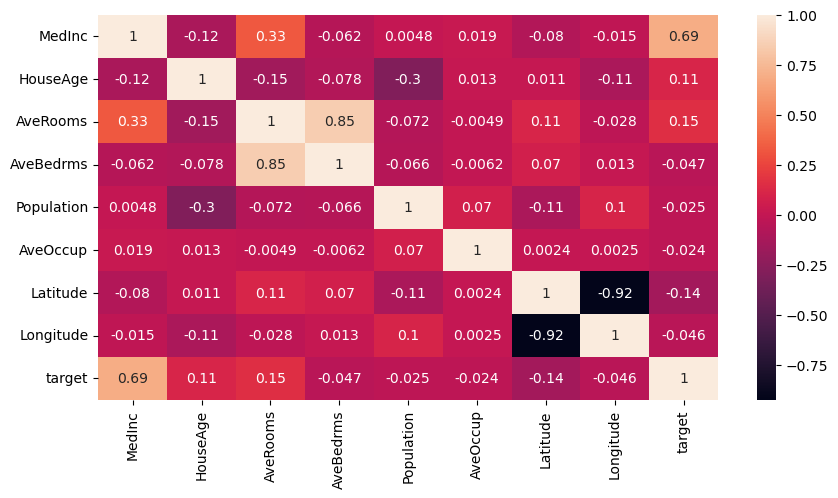

In [406]:

plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [407]:
from sklearn.preprocessing import MinMaxScaler
col=data.columns
mm=MinMaxScaler(feature_range=(0,1))
data=mm.fit_transform(data)
data=pd.DataFrame(data,columns=col)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713


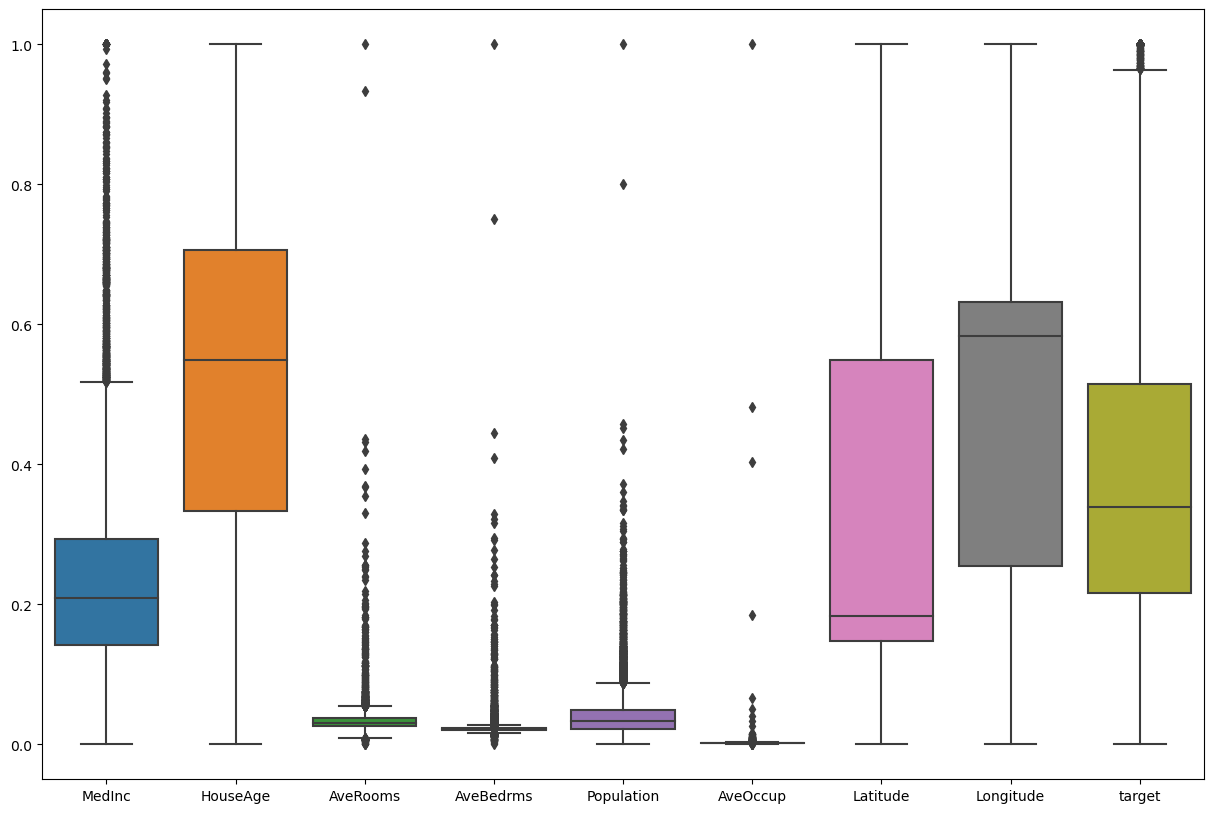

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
sns.boxplot(data)
plt.show()

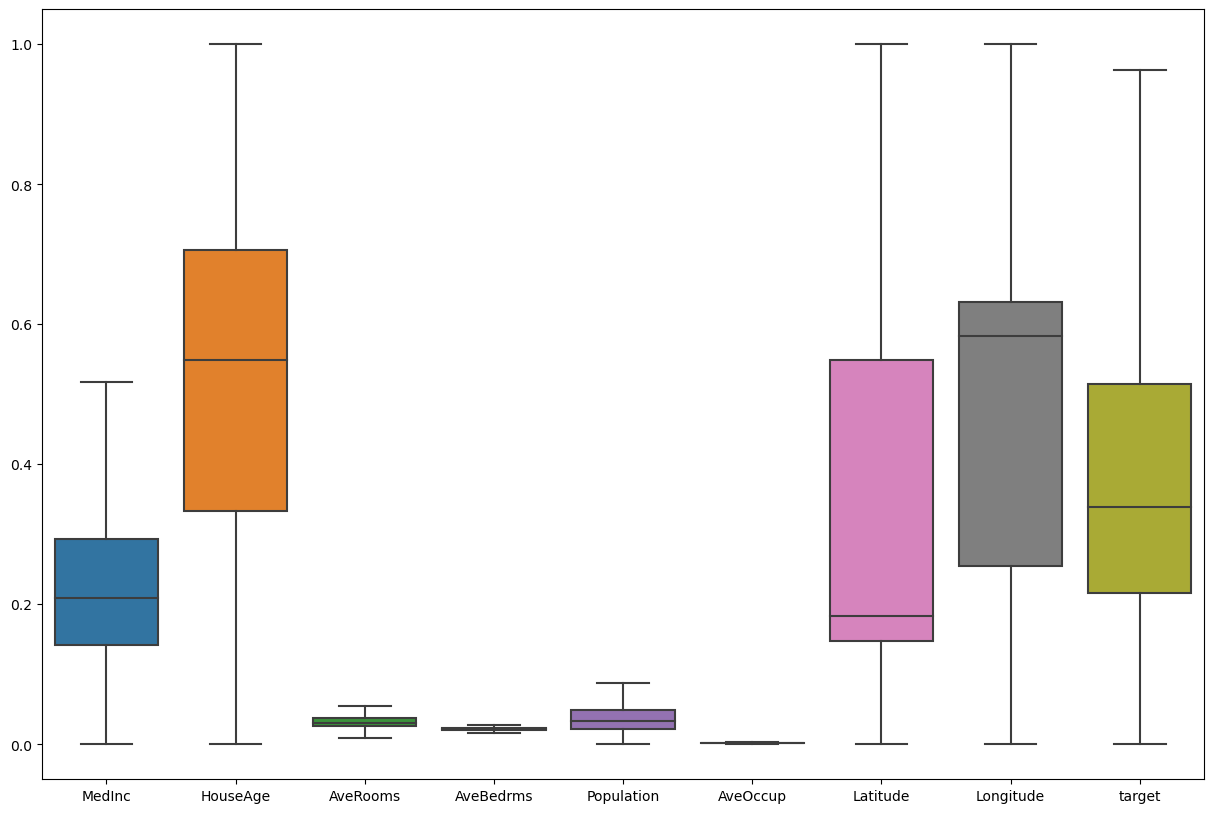

In [409]:
def f(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    ll=q1-(IQR*1.5)
    ul=q3+(IQR*1.5)

    data.loc[data[i]<ll,i]=ll
    data.loc[data[i]>ul,i]=ul
for i in data.columns:
    f(i)

plt.figure(figsize=[15,10])
sns.boxplot(data)
plt.show()

In [410]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.518139,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.518139,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.026868,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [411]:
y

0        0.902266
1        0.708247
2        0.695051
3        0.672783
4        0.674638
           ...   
20635    0.130105
20636    0.128043
20637    0.159383
20638    0.143713
20639    0.153403
Name: target, Length: 20640, dtype: float64

# 4. Model Building

In [412]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [413]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [414]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

# 5. Model Evaluation

In [415]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.02212356, 0.37605552, 0.67588529, ..., 0.46032717, 0.25223495,
       0.37056657])

In [416]:
print(model_lr.score(x_test,y_test))
print(model_lr.score(x_train,y_train))

0.6627731512563051
0.6726098556498197


In [417]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.10088295771631249
0.018146856954120622
0.13471027041068778


# 6. Result Visualization

In [418]:
x_test

array([[-1.27963356, -0.28346293, -0.89640105, ...,  1.41697147,
         0.19166399,  0.28664112],
       [-0.7678621 ,  0.11294728, -0.21798255, ..., -0.31456377,
        -0.23911452,  0.06196251],
       [-0.19667194,  1.85715216, -1.06860831, ..., -2.22222383,
         1.00639726, -1.42590916],
       ...,
       [-0.17746772, -0.99700129, -1.24067269, ..., -0.76308896,
        -0.92742367,  0.8358555 ],
       [-0.09438989, -1.47269353,  0.15255132, ...,  0.93998078,
         1.01576201, -0.84673764],
       [-0.45439381, -0.91771925, -1.56619989, ..., -0.40825197,
        -0.70266966,  0.67109119]])

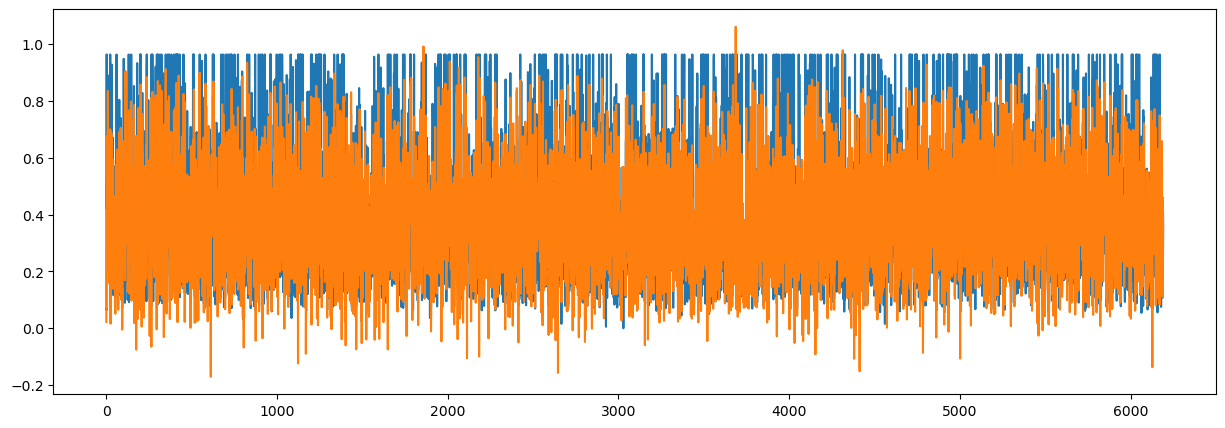

In [419]:
#plt.plot(x_test[:,0],y_test)
#plt.plot(x_test[:,0],y_pred)

plt.figure(figsize=[15,5])
plt.plot(range(0,len(x_test)),y_test)
plt.plot(range(0,len(x_test)),y_pred)

plt.show()

In [420]:
y_test

20046    0.067424
3024     0.063507
15663    0.963735
20484    0.419794
9814     0.542268
           ...   
17505    0.458763
13512    0.107837
10842    0.419382
16559    0.215259
5786     0.401650
Name: target, Length: 6192, dtype: float64

In [421]:
y_pred

array([0.02212356, 0.37605552, 0.67588529, ..., 0.46032717, 0.25223495,
       0.37056657])

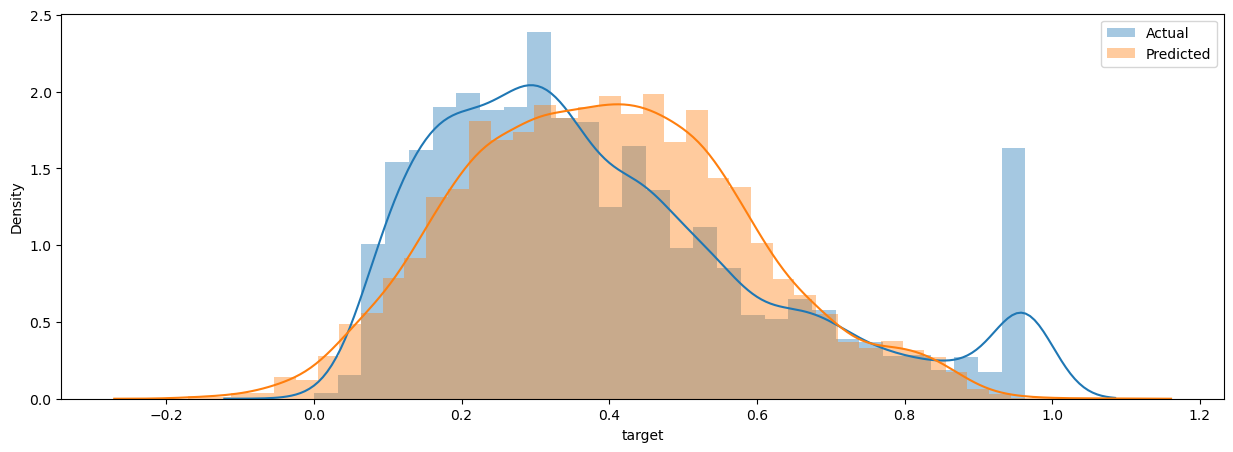

In [422]:
plt.figure(figsize=[15,5])

sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")

plt.legend()
plt.show()